### The story

This project is going to analyse the interaction between the silver price and crude oil price on a daily basis. We have taken the prices from international databases where daily data is available using data scraping.


#### Importing the necessary Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import html5lib   # this lib helps to generate the table directly from the URL

In [2]:
# This is the link of the webpage for scraping:
url= 'https://www.eia.gov/dnav/pet/hist/rwtcD.htm'

In [13]:
# We use the 'read_html' method of the Pandas library to read the HTML tables. This will return a list of dataframes.
# skiprows skip anyrow we wish, here we set it to 0 because we need all of it(we dont need it here).
# header makes the heads of the columns
# we need to add [0] if need to select first item of returened list, because read_html return list of DataFrames.
# but here we add [5] to get to the table we need. We have to play with the number in the square bracket to get to
# the point we need. 

 
df = pd.read_html(url, header=0)[5]
df

,Week Of,Mon,Tue,Wed,Thu,Fri
0,1985 Dec-30 to Jan- 3,NaN,NaN,NaN,25.56,26.00
1,1986 Jan- 6 to Jan-10,26.53,25.85,25.87,26.03,25.65
2,1986 Jan-13 to Jan-17,25.08,24.97,25.18,23.98,23.63
3,1986 Jan-20 to Jan-24,21.33,20.61,20.25,19.93,19.45
4,1986 Jan-27 to Jan-31,20.87,19.45,19.61,19.58,18.95
...,...,...,...,...,...,...
2235,2021 Sep-13 to Sep-17,70.54,70.53,72.59,72.69,72.09
2236,2021 Sep-20 to Sep-24,70.41,70.51,72.37,73.43,74.18
2237,NaN,NaN,NaN,NaN,NaN,NaN
2238,2021 Sep-27 to Oct- 1,75.54,75.44,75.06,75.22,76.01


In [17]:
# check for Nan(missing values)
df.isnull().sum()

Week Of      373
Oil_Price    533
Tue          389
Wed          391
Thu          419
Fri          456
dtype: int64

In [19]:
# we are interested in the oil price on Mondays only, so we rename the column to Oil_Price:
df = df.rename(columns={'Mon':'Oil_Price'})
df

,Week Of,Oil_Price,Tue,Wed,Thu,Fri
0,1985 Dec-30 to Jan- 3,NaN,NaN,NaN,25.56,26.00
1,1986 Jan- 6 to Jan-10,26.53,25.85,25.87,26.03,25.65
2,1986 Jan-13 to Jan-17,25.08,24.97,25.18,23.98,23.63
3,1986 Jan-20 to Jan-24,21.33,20.61,20.25,19.93,19.45
4,1986 Jan-27 to Jan-31,20.87,19.45,19.61,19.58,18.95
...,...,...,...,...,...,...
2235,2021 Sep-13 to Sep-17,70.54,70.53,72.59,72.69,72.09
2236,2021 Sep-20 to Sep-24,70.41,70.51,72.37,73.43,74.18
2237,NaN,NaN,NaN,NaN,NaN,NaN
2238,2021 Sep-27 to Oct- 1,75.54,75.44,75.06,75.22,76.01


In [20]:
# this is to get the mean of the pil price:
print(df['Oil_Price'].mean())

44.1745811364968


In [48]:
# linear interpolation of the Oil_Price column:
df['Oil_Price'].interpolate(method='linear', axis=0, inplace=True)

In [49]:
# Checking if Nan is replaced with our mean 

df.isnull().sum()

Week Of      373
Oil_Price      1
Tue          389
Wed          391
Thu          419
Fri          456
dtype: int64

In [54]:
print(df['Oil_Price'].mean())

44.45256811076375


In [56]:
# subsetting the column 'Oil_Price'. Assigned 'df' to a new variable 'subset'
subset = df.loc[:, 'Oil_Price']
subset.head()

0      NaN
1    26.53
2    25.08
3    21.33
4    20.87
Name: Oil_Price, dtype: float64

In [57]:
subset.to_csv('cleaned_oil_data.csv', index=False)

### Importing Silver csv file that was extracted from a webpage

In [58]:
silver = pd.read_csv('gld_price_data.csv')
silver

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.1800,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.2850,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.1670,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.0530,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.5900,1.557099
...,...,...,...,...,...,...
2285,5/8/2018,2671.919922,124.589996,14.060000,15.5100,1.186789
2286,5/9/2018,2697.790039,124.330002,14.370000,15.5300,1.184722
2287,5/10/2018,2723.070068,125.180000,14.410000,15.7400,1.191753
2288,5/14/2018,2730.129883,124.489998,14.380000,15.5600,1.193118


In [59]:
# extracting column('Date' & 'SLV')
silver_1 = silver.loc[:, ['Date', 'SLV']]
silver_1

,Date,SLV
0,1/2/2008,15.1800
1,1/3/2008,15.2850
2,1/4/2008,15.1670
3,1/7/2008,15.0530
4,1/8/2008,15.5900
...,...,...
2285,5/8/2018,15.5100
2286,5/9/2018,15.5300
2287,5/10/2018,15.7400
2288,5/14/2018,15.5600


In [61]:
# to match the size of both DataFrames, we extract the desired number of rows(2179)
silver_2 = silver_1.loc[0:2239]
silver_2

,Date,SLV
0,1/2/2008,15.180
1,1/3/2008,15.285
2,1/4/2008,15.167
3,1/7/2008,15.053
4,1/8/2008,15.590
...,...,...
2235,2/16/2018,15.730
2236,2/20/2018,15.540
2237,2/21/2018,15.540
2238,2/22/2018,15.660


In [62]:
silver_2['Date']= pd.to_datetime(silver_2['Date'])
silver_2

,Date,SLV
0,2008-01-02,15.180
1,2008-01-03,15.285
2,2008-01-04,15.167
3,2008-01-07,15.053
4,2008-01-08,15.590
...,...,...
2235,2018-02-16,15.730
2236,2018-02-20,15.540
2237,2018-02-21,15.540
2238,2018-02-22,15.660


In [39]:
#  In the case of extracting just the year from the column('Date')
# silver_2['Year'] = silver_2['Date'].dt.year
# silver_2

In [40]:
semi_final = pd.concat([silver_2, subset], axis=1)
semi_final

,Date,SLV,Oil_Price
0,2008-01-02,15.180,NaN
1,2008-01-03,15.285,26.530
2,2008-01-04,15.167,25.080
3,2008-01-07,15.053,21.330
4,2008-01-08,15.590,20.870
...,...,...,...
2235,NaT,NaN,70.540
2236,NaT,NaN,70.410
2237,NaT,NaN,72.975
2238,NaT,NaN,75.540


In [63]:
#  Rounding the column('SLV', 'Oil_Price') to 2 decimal place
final = semi_final.round({'SLV':2, 'Oil_Price':2})
final

,Date,SLV,Oil_Price
0,2008-01-02,15.18,NaN
1,2008-01-03,15.28,26.53
2,2008-01-04,15.17,25.08
3,2008-01-07,15.05,21.33
4,2008-01-08,15.59,20.87
...,...,...,...
2235,NaT,NaN,70.54
2236,NaT,NaN,70.41
2237,NaT,NaN,72.97
2238,NaT,NaN,75.54


In [67]:
final['Year'] = final['Date'].dt.year
final.isnull().sum()

Date         61
SLV          61
Oil_Price     1
Year         61
dtype: int64

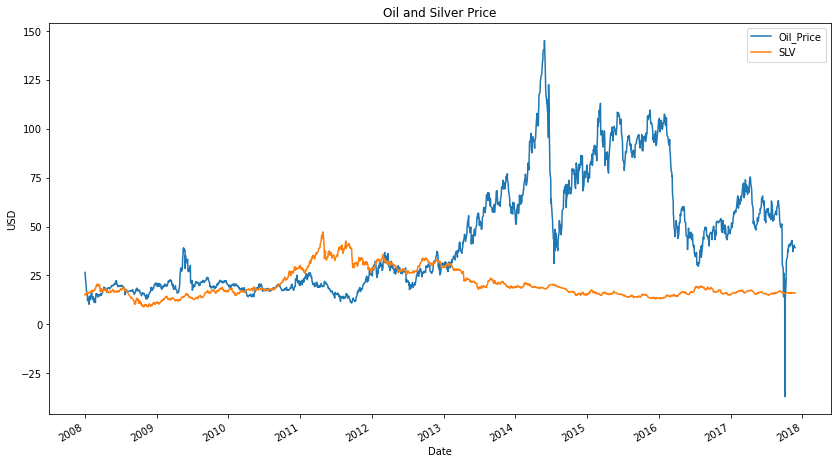

In [65]:
final.plot(x ='Date', y=['Oil_Price','SLV'], figsize=(14,8))
plt.title('Oil and Silver Price')
plt.ylabel('USD')
plt.show()

The figure above indicates that oil price and silver price does not have any association between themselves.
The silver price seems to be stable and having less fluctuations in the pattern.
But oil price has fluctuated over time especially after 2011.

In [44]:
# we applied this function to get rid of $ signs:
#df1.Average = df1.Average.str.replace('$','').astype(float)
#df1.Low = df1.Low.str.replace('$','').astype(float)
#df1.High = df1.High.str.replace('$','').astype(float)


In [66]:
#this is to save the OilPrice column into CSV:
final.to_csv('final.data.project_csv',index=False)